<!--NOTEBOOK_INFORMATION-->
<img id="r-1060983" data-claire-element-id="1061343" src="http://www.siteduzero.com/favicon.ico" alt="Image utilisateur">
    <p>
        **<font color='#D2691E'size="6">Tags recommendation (7/7)</font>**.
    </p>
    <p>
        This notebook pilots the previous one, "5_Unsupervised_learning_benchmark_3_algorithms.ipynb" by varying its parameters : the final goal is to compare the 3 unsupervised approaches by changing some hyperparameters.
    </p>

<p>
    <center>
        **<font color='	#D2691E'size="6">PLAN</font>**
    </center>
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>
<p>
        **<font color='#D2691E'size="4">I) Starting the program</font>**
</p>
<p>
        **<font color='#D2691E'size="4">II) Resultes analyzis</font>**
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>

In [1]:
import time
import pickle
import pandas as pd
import numpy as np

In [2]:
from context import dir_path, datasources_path, enrichment_path, pickles_path, temp_files_path

<p>
        **<font color='#D2691E'size="4">I) Starting the program</font>**
</p>

In [3]:
result_schema = \
['RUN','N_COMPONENTS','TOPICS_THRESHOLD','NEIGHBORS','QUANTILE_THRESHOLD','orig_avg_accuracy','nmf_avg_accuracy',\
 'lda_avg_accuracy','lda_w2v_avg_accuracy','nmf_avg_tags_number_accuracy','lda_avg_tags_number_accuracy',\
 'lda_w2v_avg_tags_number_accuracy','nmf_global_accuracy','lda_global_accuracy','lda_global_avg_accuracy',\
 'orig_med_accuracy','nmf_med_accuracy','lda_med_accuracy','lda_w2v_med_accuracy','orig_avg_tags_number',\
 'nmf_avg_tags_number','lda_avg_tags_number','lda_w2v_avg_tags_number','orig_med_tags_number',\
 'nmf_med_tags_number','lda_med_tags_number','lda_w2v_med_tags_number']

In [4]:
results_df = pd.DataFrame(columns=result_schema)
results_df.to_csv(datasources_path+"results.csv", mode='a', header=True)
results_df

,RUN,N_COMPONENTS,TOPICS_THRESHOLD,NEIGHBORS,QUANTILE_THRESHOLD,orig_avg_accuracy,nmf_avg_accuracy,lda_avg_accuracy,lda_w2v_avg_accuracy,nmf_avg_tags_number_accuracy,...,lda_med_accuracy,lda_w2v_med_accuracy,orig_avg_tags_number,nmf_avg_tags_number,lda_avg_tags_number,lda_w2v_avg_tags_number,orig_med_tags_number,nmf_med_tags_number,lda_med_tags_number,lda_w2v_med_tags_number


In [5]:
L_components = [10,20,30]
L_topics_thresholds = list(np.arange(0.05,0.51,.05))
L_neighboors = [5,10,15,20]
L_quantiles_thresholds = [0.75,0.8]
STEPS = len(L_components)*len(L_topics_thresholds)*len(L_neighboors)*len(L_quantiles_thresholds)
print("Calculated steps : %s"%STEPS)

Calculated steps : 240


In [6]:
global_start_time = time.time()

In [7]:
RUN = 0
for N_COMPONENTS in L_components:
    print("\n\n\n RUN %s / %s \n\n\n"%(RUN,STEPS))
    for TOPICS_THRESHOLD in L_topics_thresholds:
        for NEIGHBORS in L_neighboors:
            for QUANTILE_THRESHOLD in L_quantiles_thresholds:
                execution_params_workflows_iteration = {'N_COMPONENTS' : N_COMPONENTS,
                                                        'TOPICS_THRESHOLD':TOPICS_THRESHOLD,
                                                        'NEIGHBORS':NEIGHBORS,
                                                        'QUANTILE_THRESHOLD':QUANTILE_THRESHOLD,
                                                        'RUN':RUN
                                                       }
                #We dump our execution params :
                pickle.dump(execution_params_workflows_iteration,open(pickles_path+"execution_params_workflows_iteration.p", "wb"))
                %run -i 2_Apprentissage_non_supervise_performances_3_algos.ipynb
                
                sub_results_df = pickle.load(open(pickles_path+"1_workflows_iteration_results_df.p", "rb" ))
            
                sub_results_df.to_csv(datasources_path+"results.csv", mode='a', header=False)
                
                RUN+=1
                print("\n\n\n--- EXECUTION TIME : %s SECONDS ---" % (time.time() - global_start_time))
        
        
        
        




 RUN 0 / 240 



Library, functions and datasources import



Starting run 0 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.05
NEIGHBORS = 5
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11269855499267578 seconds ---
Fitting the NMF model
--- 0.18841099739074707 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.12267565727233887 seconds ---
Fitting the LDA model
--- 4.950775623321533 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 5.036100149154663 seconds ---
the result file is available at : 
 temp_files_path+"developped_datafra

c:\python\python36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


--- 11.587990999221802 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.55582594871521 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.099203109741211 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.05584907531738281 seconds ---
Extracting count features for lda...
--- 0.049866676330566406 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.975523710250854 seconds ---
the result file is available at : 
 temp_files_path

final_results ready
appending sub lists :
success
--- 34.504889249801636 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.61934591195
lda_avg_accuracy : 0.60493081761
lda_w2v_avg_accuracy : 0.71786163522

nmf_avg_tags_number_accuracy : 0.467604971999
lda_avg_tags_number_accuracy : 0.462271725205
lda_w2v_avg_tags_number_accuracy : 0.446145439085

nmf_global_accuracy : 0.568765598633
lda_global_accuracy : 0.557377786808
lda_global_avg_accuracy : 0.627289569842



--- EXECUTION TIME : 234.0678949356079 SECONDS ---
Library, functions and datasources import



Starting run 3 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.05
NEIGHBORS = 10
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11269879341125488 seconds ---
Fitting the NMF model
--- 0.1682593822479248 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_sc

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.7457053661346436 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.312123775482178 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.501969337463379 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.227215528488159 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.0518949031829834 seconds ---
Ex

final_results ready
appending sub lists :
success
--- 9.064297199249268 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 3.123345375061035 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 35.15603065490723 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.644402515723
lda_avg_accuracy : 0.645270440252
lda_w2v_avg_accuracy : 0.726477987421

nmf_avg_tags_number_accuracy : 0.441343443827
lda_avg_tags_number_accuracy : 0.420778120909
lda_w2v_avg_tags_number_ac

--- 0.1127309799194336 seconds ---
Fitting the NMF model
--- 0.17273235321044922 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11274480819702148 seconds ---
Fitting the LDA model
--- 4.658554792404175 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.6533362865448 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building t

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0782358646392822 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04686784744262695 seconds ---
Extracting count features for lda...
--- 0.04388070106506348 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 9.068674564361572 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.7164900302886963 seconds

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.637358490566
lda_avg_accuracy : 0.636616352201
lda_w2v_avg_accuracy : 0.702817610063

nmf_avg_tags_number_accuracy : 0.447903905016
lda_avg_tags_number_accuracy : 0.436997360868
lda_w2v_avg_tags_number_accuracy : 0.440813268472

nmf_global_accuracy : 0.574206962049
lda_global_accuracy : 0.570076688423
lda_global_avg_accuracy : 0.615482829533



--- EXECUTION TIME : 1154.3412251472473 SECONDS ---
Library, functions and datasources import



Starting run 15 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.1
NEIGHBORS = 20
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11372876167297363 seconds ---
Fitting the NMF model
--- 0.16750645637512207 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11184239387512207 seconds ---
Fitting the LDA model
--- 4.608652591705322 seconds ---
Topics associated to words man

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.054351806640625 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.259617567062378 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.07100772857666 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04697561264038086 seconds ---
Extracting count features for lda...
--- 0.044879913330078125 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Mul

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.622265577316284 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.591433962264
lda_avg_accuracy : 0.592477987421
lda_w2v_avg_accuracy : 0.653132075472

nmf_avg_tags_number_accuracy : 0.524843461965
lda_avg_tags_number_accuracy : 0.502819070464
lda_w2v_avg_tags_number_accuracy : 0.507488137717

nmf_global_accuracy : 0.569237128831
lda_global_accuracy : 0.562591681769
lda_global_avg_accuracy : 0.60458409622



--- EXECUTION TIME : 1529.2151341438293 SECONDS ---
Library, functions and datasources import



Starting run 20 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.15
NEIGHBORS = 15
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.1136636734008789 seconds ---
Fitting the NMF model
--- 0.16846

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.639554500579834 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.054432153701782 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.233686923980713 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0890183448791504 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.05086469650268555 seconds ---
E

final_results ready
appending sub lists :
success
--- 8.675413846969604 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5183942317962646 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.580907106399536 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.587735849057
lda_avg_accuracy : 0.559081761006
lda_w2v_avg_accuracy : 0.630503144654

nmf_avg_tags_number_accuracy : 0.564214365739
lda_avg_tags_number_accuracy : 0.551462361939
lda_w2v_avg_tags_number_

--- 0.11466407775878906 seconds ---
Fitting the NMF model
--- 0.1645965576171875 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11283349990844727 seconds ---
Fitting the LDA model
--- 4.628599643707275 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.750550985336304 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags similarity matrix
--- 2.0754082202911377 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04687619209289551 seconds ---
Extracting count features for lda...
--- 0.04488062858581543 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.765573740005493 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.721177577972412 seconds ---
the result file is available at : 

--- 0.11278486251831055 seconds ---
Fitting the NMF model
--- 0.16732192039489746 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11170148849487305 seconds ---
Fitting the LDA model
--- 4.531888484954834 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.627523422241211 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.1040754318237305 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04800844192504883 seconds ---
Extracting count features for lda...
--- 0.042853355407714844 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.66415286064148 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.614363431930542 seconds 

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.597748427673
lda_avg_accuracy : 0.600402515723
lda_w2v_avg_accuracy : 0.635811320755

nmf_avg_tags_number_accuracy : 0.515551908344
lda_avg_tags_number_accuracy : 0.500642255354
lda_w2v_avg_tags_number_accuracy : 0.503427170066

nmf_global_accuracy : 0.570349587897
lda_global_accuracy : 0.5671490956
lda_global_avg_accuracy : 0.591683270525



--- EXECUTION TIME : 2802.548723936081 SECONDS ---
Library, functions and datasources import



Starting run 37 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.25
NEIGHBORS = 15
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11170148849487305 seconds ---
Fitting the NMF model
--- 0.16843700408935547 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11070656776428223 seconds ---
Fitting the LDA model
--- 4.558818340301514 seconds ---
Topics associated to words manag

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.011687278747559 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.184818506240845 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0880160331726074 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.045845985412597656 seconds ---
Extracting count features for lda...
--- 0.04587674140930176 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
M

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.013919830322266 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.57572327044
lda_avg_accuracy : 0.556754716981
lda_w2v_avg_accuracy : 0.593836477987

nmf_avg_tags_number_accuracy : 0.597185063897
lda_avg_tags_number_accuracy : 0.571989715306
lda_w2v_avg_tags_number_accuracy : 0.582995817489

nmf_global_accuracy : 0.582877201592
lda_global_accuracy : 0.561833049756
lda_global_avg_accuracy : 0.590222924488



--- EXECUTION TIME : 3176.140526533127 SECONDS ---
Library, functions and datasources import



Starting run 42 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.3
NEIGHBORS = 10
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11269950866699219 seconds ---
Fitting the NMF model
--- 0.167584

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.619113922119141 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.044140338897705 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.22571587562561 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0921900272369385 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.0478663444519043 seconds ---
Ext

final_results ready
appending sub lists :
success
--- 8.774935722351074 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.718067169189453 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.86307883262634 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.602779874214
lda_avg_accuracy : 0.612314465409
lda_w2v_avg_accuracy : 0.620779874214

nmf_avg_tags_number_accuracy : 0.510101951074
lda_avg_tags_number_accuracy : 0.504212553048
lda_w2v_avg_tags_number_ac

--- 0.11372852325439453 seconds ---
Fitting the NMF model
--- 0.16819477081298828 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11269760131835938 seconds ---
Fitting the LDA model
--- 4.488970756530762 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.631837606430054 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags similarity matrix
--- 2.0740203857421875 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.047051191329956055 seconds ---
Extracting count features for lda...
--- 0.044878244400024414 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.747914791107178 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.62271785736084 seconds ---
the result file is available at :

--- 0.11279654502868652 seconds ---
Fitting the NMF model
--- 0.16586971282958984 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11183547973632812 seconds ---
Fitting the LDA model
--- 4.532856225967407 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.640221118927002 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags similarity matrix
--- 2.1676888465881348 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.047873497009277344 seconds ---
Extracting count features for lda...
--- 0.049898624420166016 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.977181196212769 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.6181111335754395 seconds ---
the result file is available at

--- 0.11313629150390625 seconds ---
Fitting the NMF model
--- 0.17028164863586426 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.12671947479248047 seconds ---
Fitting the LDA model
--- 4.598703622817993 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.538753271102905 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0858514308929443 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04986763000488281 seconds ---
Extracting count features for lda...
--- 0.045871734619140625 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.683033466339111 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.6121809482574463 second

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.586993710692
lda_avg_accuracy : 0.601157232704
lda_w2v_avg_accuracy : 0.597647798742

nmf_avg_tags_number_accuracy : 0.549518140466
lda_avg_tags_number_accuracy : 0.519788360543
lda_w2v_avg_tags_number_accuracy : 0.552787167686

nmf_global_accuracy : 0.57450185395
lda_global_accuracy : 0.574034275317
lda_global_avg_accuracy : 0.582694255057



--- EXECUTION TIME : 4820.007905244827 SECONDS ---
Library, functions and datasources import



Starting run 64 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.45
NEIGHBORS = 5
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11170220375061035 seconds ---
Fitting the NMF model
--- 0.16464829444885254 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11232137680053711 seconds ---
Fitting the LDA model
--- 4.554797410964966 seconds ---
Topics associated to words mana

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.057384967803955 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.2187581062316895 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.096982479095459 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.045946598052978516 seconds ---
Extracting count features for lda...
--- 0.04385113716125488 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
M

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.515400886535645 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.577685534591
lda_avg_accuracy : 0.588075471698
lda_w2v_avg_accuracy : 0.595220125786

nmf_avg_tags_number_accuracy : 0.565372913749
lda_avg_tags_number_accuracy : 0.536570584468
lda_w2v_avg_tags_number_accuracy : 0.553208304298

nmf_global_accuracy : 0.573581327644
lda_global_accuracy : 0.570907175955
lda_global_avg_accuracy : 0.58121618529



--- EXECUTION TIME : 5191.38579750061 SECONDS ---
Library, functions and datasources import



Starting run 69 with params :
N_COMPONENTS = 10 
THRESHOLD = 0.45
NEIGHBORS = 15
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11469125747680664 seconds ---
Fitting the NMF model
--- 0.1692805

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.539823055267334 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.106121301651001 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.132957220077515 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0644924640655518 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.05397605895996094 seconds ---
E

final_results ready
appending sub lists :
success
--- 8.643486022949219 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.51796293258667 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.416173458099365 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.553396226415
lda_avg_accuracy : 0.553987421384
lda_w2v_avg_accuracy : 0.57772327044

nmf_avg_tags_number_accuracy : 0.638311477294
lda_avg_tags_number_accuracy : 0.584583900729
lda_w2v_avg_tags_number_acc

--- 0.11269998550415039 seconds ---
Fitting the NMF model
--- 0.16874122619628906 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11369657516479492 seconds ---
Fitting the LDA model
--- 4.565760612487793 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.6405699253082275 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildi

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0923101902008057 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04704785346984863 seconds ---
Extracting count features for lda...
--- 0.04288434982299805 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.643893003463745 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.7185475826263428 seconds

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.598490566038
lda_avg_accuracy : 0.587295597484
lda_w2v_avg_accuracy : 0.679132075472

nmf_avg_tags_number_accuracy : 0.552809151233
lda_avg_tags_number_accuracy : 0.535034913874
lda_w2v_avg_tags_number_accuracy : 0.517790675151

nmf_global_accuracy : 0.583263427769
lda_global_accuracy : 0.569875369614
lda_global_avg_accuracy : 0.625351608698



--- EXECUTION TIME : 6089.751601934433 SECONDS ---
Library, functions and datasources import



Starting run 81 with params :
N_COMPONENTS = 20 
THRESHOLD = 0.05
NEIGHBORS = 5
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11182451248168945 seconds ---
Fitting the NMF model
--- 0.8542211055755615 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11369705200195312 seconds ---
Fitting the LDA model
--- 4.423176527023315 seconds ---
Topics associated to words manag

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.07706880569458 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.144924163818359 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.063606023788452 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04584455490112305 seconds ---
Extracting count features for lda...
--- 0.046846628189086914 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Mul

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.15595746040344 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.637119496855
lda_avg_accuracy : 0.625245283019
lda_w2v_avg_accuracy : 0.693660377358

nmf_avg_tags_number_accuracy : 0.492222701833
lda_avg_tags_number_accuracy : 0.458300366135
lda_w2v_avg_tags_number_accuracy : 0.467921162959

nmf_global_accuracy : 0.588820565181
lda_global_accuracy : 0.569596977391
lda_global_avg_accuracy : 0.618413972559



--- EXECUTION TIME : 6467.971071481705 SECONDS ---
Library, functions and datasources import



Starting run 86 with params :
N_COMPONENTS = 20 
THRESHOLD = 0.05
NEIGHBORS = 20
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.1127316951751709 seconds ---
Fitting the NMF model
--- 0.873200

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.6310718059539795 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 10.99762749671936 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.156867980957031 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.1357641220092773 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04701852798461914 seconds ---
E

final_results ready
appending sub lists :
success
--- 8.665682554244995 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.7030551433563232 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.78458046913147 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.601534591195
lda_avg_accuracy : 0.60251572327
lda_w2v_avg_accuracy : 0.653471698113

nmf_avg_tags_number_accuracy : 0.5250613517
lda_avg_tags_number_accuracy : 0.511350300048
lda_w2v_avg_tags_number_accu

--- 0.11167597770690918 seconds ---
Fitting the NMF model
--- 0.835453987121582 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10870885848999023 seconds ---
Fitting the LDA model
--- 4.461080551147461 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.642820835113525 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.0681512355804443 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.06083941459655762 seconds ---
Extracting count features for lda...
--- 0.043982744216918945 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.848444700241089 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.73229718208313 seconds ---
the result file is available at : 

--- 0.11269879341125488 seconds ---
Fitting the NMF model
--- 0.8501698970794678 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11074662208557129 seconds ---
Fitting the LDA model
--- 4.405228614807129 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.719003438949585 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags similarity matrix
--- 2.1645283699035645 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04592251777648926 seconds ---
Extracting count features for lda...
--- 0.04587674140930176 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.746604919433594 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.600367307662964 seconds ---
the result file is available at : 

--- 0.11070537567138672 seconds ---
Fitting the NMF model
--- 0.8488173484802246 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10877323150634766 seconds ---
Fitting the LDA model
--- 4.437116861343384 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.6430816650390625 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags similarity matrix
--- 2.074310302734375 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04784035682678223 seconds ---
Extracting count features for lda...
--- 0.044852256774902344 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.667415380477905 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.514650821685791 seconds ---
the result file is available at : 

--- 0.1127009391784668 seconds ---
Fitting the NMF model
--- 0.8564789295196533 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10870933532714844 seconds ---
Fitting the LDA model
--- 4.398217439651489 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.642157077789307 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.144834518432617 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.049836158752441406 seconds ---
Extracting count features for lda...
--- 0.04497885704040527 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.67625904083252 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.614386796951294 seconds ---
the result file is available at : 


--- 0.115692138671875 seconds ---
Fitting the NMF model
--- 0.8405120372772217 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11090254783630371 seconds ---
Fitting the LDA model
--- 4.511913299560547 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.7325279712677 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the

Starting the pure tags similarity matrix
--- 2.0845913887023926 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04495525360107422 seconds ---
Extracting count features for lda...
--- 0.043881893157958984 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.66228199005127 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5236380100250244 seconds ---
the result file is available at :

--- 0.11070394515991211 seconds ---
Fitting the NMF model
--- 0.8519351482391357 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10881757736206055 seconds ---
Fitting the LDA model
--- 4.482051372528076 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.5245184898376465 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags similarity matrix
--- 2.1545615196228027 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.05384969711303711 seconds ---
Extracting count features for lda...
--- 0.04587674140930176 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.85544466972351 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5145246982574463 seconds ---
the result file is available at : 

--- 0.11169314384460449 seconds ---
Fitting the NMF model
--- 0.8679864406585693 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11084675788879395 seconds ---
Fitting the LDA model
--- 4.5119123458862305 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.652431488037109 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildin

Starting the pure tags similarity matrix
--- 2.0824742317199707 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.048868656158447266 seconds ---
Extracting count features for lda...
--- 0.04407215118408203 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.751381635665894 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.524564266204834 seconds ---
the result file is available at :

--- 0.11269688606262207 seconds ---
Fitting the NMF model
--- 0.8549132347106934 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10970687866210938 seconds ---
Fitting the LDA model
--- 4.466046333312988 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.641860246658325 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags similarity matrix
--- 2.136174440383911 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.046965599060058594 seconds ---
Extracting count features for lda...
--- 0.04488039016723633 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.645301103591919 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5241827964782715 seconds ---
the result file is available at :

--- 0.11291909217834473 seconds ---
Fitting the NMF model
--- 0.8611006736755371 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10964846611022949 seconds ---
Fitting the LDA model
--- 4.41719651222229 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.641926050186157 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.080537796020508 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.045942068099975586 seconds ---
Extracting count features for lda...
--- 0.04494667053222656 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.56403398513794 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5309526920318604 seconds ---
the result file is available at : 

--- 0.11188411712646484 seconds ---
Fitting the NMF model
--- 0.8483946323394775 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10970020294189453 seconds ---
Fitting the LDA model
--- 4.394289016723633 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.537231922149658 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags similarity matrix
--- 2.1436607837677 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04690694808959961 seconds ---
Extracting count features for lda...
--- 0.047061920166015625 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.755672216415405 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.513068675994873 seconds ---
the result file is available at : 
 

--- 0.11181068420410156 seconds ---
Fitting the NMF model
--- 0.8506741523742676 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10870957374572754 seconds ---
Fitting the LDA model
--- 4.48903751373291 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.631462335586548 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.0835347175598145 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04492664337158203 seconds ---
Extracting count features for lda...
--- 0.0469508171081543 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.671103954315186 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.4116921424865723 seconds ---
the result file is available at : 

--- 0.11369752883911133 seconds ---
Fitting the NMF model
--- 0.8546550273895264 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10871243476867676 seconds ---
Fitting the LDA model
--- 4.4411327838897705 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.5284600257873535 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Buildi

Starting the pure tags similarity matrix
--- 2.147242546081543 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.0468754768371582 seconds ---
Extracting count features for lda...
--- 0.04587841033935547 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.562294244766235 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.513737201690674 seconds ---
the result file is available at : 
 

--- 0.11170291900634766 seconds ---
Fitting the NMF model
--- 0.8572680950164795 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.10867905616760254 seconds ---
Fitting the LDA model
--- 4.454096794128418 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.643003225326538 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags similarity matrix
--- 2.0917465686798096 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04587864875793457 seconds ---
Extracting count features for lda...
--- 0.045839548110961914 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.665349960327148 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.6123392581939697 seconds ---
the result file is available at 

--- 0.11070466041564941 seconds ---
Fitting the NMF model
--- 0.867912769317627 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.1107029914855957 seconds ---
Fitting the LDA model
--- 4.445146322250366 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.619152784347534 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building t

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.145942449569702 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.047986507415771484 seconds ---
Extracting count features for lda...
--- 0.04291582107543945 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.797808408737183 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.623962640762329 seconds 

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.607295597484
lda_avg_accuracy : 0.604641509434
lda_w2v_avg_accuracy : 0.690943396226

nmf_avg_tags_number_accuracy : 0.525367820451
lda_avg_tags_number_accuracy : 0.484841580683
lda_w2v_avg_tags_number_accuracy : 0.47918023372

nmf_global_accuracy : 0.579986338473
lda_global_accuracy : 0.56470819985
lda_global_avg_accuracy : 0.620355675391



--- EXECUTION TIME : 12258.153358459473 SECONDS ---
Library, functions and datasources import



Starting run 163 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.05
NEIGHBORS = 10
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11372590065002441 seconds ---
Fitting the NMF model
--- 0.5739378929138184 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11296391487121582 seconds ---
Fitting the LDA model
--- 4.459061145782471 seconds ---
Topics associated to words mana

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.008196830749512 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.072150230407715 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0718495845794678 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04787445068359375 seconds ---
Extracting count features for lda...
--- 0.04488062858581543 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Mu

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.34985947608948 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.629358490566
lda_avg_accuracy : 0.634377358491
lda_w2v_avg_accuracy : 0.688591194969

nmf_avg_tags_number_accuracy : 0.495698233349
lda_avg_tags_number_accuracy : 0.44247873113
lda_w2v_avg_tags_number_accuracy : 0.462830242426

nmf_global_accuracy : 0.584805071494
lda_global_accuracy : 0.570411149371
lda_global_avg_accuracy : 0.613337544121



--- EXECUTION TIME : 12636.788002252579 SECONDS ---
Library, functions and datasources import



Starting run 168 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.1
NEIGHBORS = 5
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.1107034683227539 seconds ---
Fitting the NMF model
--- 0.5685393

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.6456804275512695 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.061610460281372 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.146950721740723 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.130420684814453 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04787254333496094 seconds ---
E

final_results ready
appending sub lists :
success
--- 8.668274164199829 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.809478759765625 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.534465074539185 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.619572327044
lda_avg_accuracy : 0.610603773585
lda_w2v_avg_accuracy : 0.661811320755

nmf_avg_tags_number_accuracy : 0.533354579851
lda_avg_tags_number_accuracy : 0.492880380676
lda_w2v_avg_tags_number_a

--- 0.1152963638305664 seconds ---
Fitting the NMF model
--- 0.5702507495880127 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11073470115661621 seconds ---
Fitting the LDA model
--- 4.408222436904907 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.621159315109253 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.0824644565582275 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.046938180923461914 seconds ---
Extracting count features for lda...
--- 0.04497170448303223 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.749260425567627 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5048952102661133 seconds ---
the result file is available at 

--- 0.11269426345825195 seconds ---
Fitting the NMF model
--- 0.5751392841339111 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.1106710433959961 seconds ---
Fitting the LDA model
--- 4.371320724487305 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.723505020141602 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.1337733268737793 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04896092414855957 seconds ---
Extracting count features for lda...
--- 0.04387712478637695 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.654417514801025 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.7150368690490723 seconds ---
the result file is available at :

--- 0.11771178245544434 seconds ---
Fitting the NMF model
--- 0.5704584121704102 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11287736892700195 seconds ---
Fitting the LDA model
--- 4.467062950134277 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.632295608520508 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.069382905960083 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.0479731559753418 seconds ---
Extracting count features for lda...
--- 0.04488110542297363 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.460832118988037 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.5999131202697754 seconds -

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.596377358491
lda_avg_accuracy : 0.584176100629
lda_w2v_avg_accuracy : 0.609056603774

nmf_avg_tags_number_accuracy : 0.590992119713
lda_avg_tags_number_accuracy : 0.557257663119
lda_w2v_avg_tags_number_accuracy : 0.573612075101

nmf_global_accuracy : 0.594582278898
lda_global_accuracy : 0.575203288126
lda_global_avg_accuracy : 0.597241760883



--- EXECUTION TIME : 14293.23524427414 SECONDS ---
Library, functions and datasources import



Starting run 190 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.2
NEIGHBORS = 20
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11484599113464355 seconds ---
Fitting the NMF model
--- 0.560396671295166 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11170148849487305 seconds ---
Fitting the LDA model
--- 4.7513039112091064 seconds ---
Topics associated to words man

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 10.984320640563965 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.092090845108032 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.1621756553649902 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04895758628845215 seconds ---
Extracting count features for lda...
--- 0.04599905014038086 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Mu

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.460408449172974 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.572452830189
lda_avg_accuracy : 0.57241509434
lda_w2v_avg_accuracy : 0.60041509434

nmf_avg_tags_number_accuracy : 0.61609601944
lda_avg_tags_number_accuracy : 0.579030418737
lda_w2v_avg_tags_number_accuracy : 0.589206390315

nmf_global_accuracy : 0.587000559939
lda_global_accuracy : 0.574620202472
lda_global_avg_accuracy : 0.596678859665



--- EXECUTION TIME : 14671.081062555313 SECONDS ---
Library, functions and datasources import



Starting run 195 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.25
NEIGHBORS = 10
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11768627166748047 seconds ---
Fitting the NMF model
--- 0.570456

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.521409511566162 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.115126848220825 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.139941453933716 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.0850377082824707 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04484748840332031 seconds ---
E

final_results ready
appending sub lists :
success
--- 8.78457522392273 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.63765287399292 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 32.71721792221069 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.581031446541
lda_avg_accuracy : 0.58065408805
lda_w2v_avg_accuracy : 0.593811320755

nmf_avg_tags_number_accuracy : 0.602880682055
lda_avg_tags_number_accuracy : 0.560053661052
lda_w2v_avg_tags_number_accur

--- 0.1156914234161377 seconds ---
Fitting the NMF model
--- 0.5614240169525146 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11169576644897461 seconds ---
Fitting the LDA model
--- 4.426140069961548 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.622662782669067 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.1674208641052246 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04587912559509277 seconds ---
Extracting count features for lda...
--- 0.04290127754211426 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 9.090498924255371 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.7057292461395264 seconds

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.586880503145
lda_avg_accuracy : 0.578641509434
lda_w2v_avg_accuracy : 0.586075471698

nmf_avg_tags_number_accuracy : 0.606772468559
lda_avg_tags_number_accuracy : 0.572722691994
lda_w2v_avg_tags_number_accuracy : 0.58590148039

nmf_global_accuracy : 0.593511158283
lda_global_accuracy : 0.576668570287
lda_global_avg_accuracy : 0.586017474595



--- EXECUTION TIME : 15591.142499923706 SECONDS ---
Library, functions and datasources import



Starting run 207 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.3
NEIGHBORS = 20
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11965346336364746 seconds ---
Fitting the NMF model
--- 0.5839583873748779 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.11769747734069824 seconds ---
Fitting the LDA model
--- 4.498040676116943 seconds ---
Topics associated to words mana

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 12.095155477523804 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 5.462087154388428 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.4103798866271973 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.056867122650146484 seconds ---
Extracting count features for lda...
--- 0.058602094650268555 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags


OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 36.07936143875122 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.560062893082
lda_avg_accuracy : 0.568389937107
lda_w2v_avg_accuracy : 0.576264150943

nmf_avg_tags_number_accuracy : 0.648499930151
lda_avg_tags_number_accuracy : 0.602497121603
lda_w2v_avg_tags_number_accuracy : 0.631866272243

nmf_global_accuracy : 0.589541905438
lda_global_accuracy : 0.579758998606
lda_global_avg_accuracy : 0.594798191377



--- EXECUTION TIME : 15992.636704921722 SECONDS ---
Library, functions and datasources import



Starting run 212 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.35
NEIGHBORS = 15
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.16254639625549316 seconds ---
Fitting the NMF model
--- 0.710

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.831829071044922 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.233134984970093 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.3351545333862305 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.3167080879211426 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04948139190673828 seconds ---


final_results ready
appending sub lists :
success
--- 9.40387773513794 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.709876298904419 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 33.643383502960205 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.546918238994
lda_avg_accuracy : 0.548767295597
lda_w2v_avg_accuracy : 0.563320754717

nmf_avg_tags_number_accuracy : 0.654374344709
lda_avg_tags_number_accuracy : 0.622348227394
lda_w2v_avg_tags_number_ac

--- 0.11768484115600586 seconds ---
Fitting the NMF model
--- 0.6356477737426758 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.12366580963134766 seconds ---
Fitting the LDA model
--- 4.915224313735962 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 4.954218149185181 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building

Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.1099531650543213 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.05301070213317871 seconds ---
Extracting count features for lda...
--- 0.044852256774902344 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 9.279905557632446 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.6200551986694336 second

orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.558679245283
lda_avg_accuracy : 0.556566037736
lda_w2v_avg_accuracy : 0.559798742138

nmf_avg_tags_number_accuracy : 0.643118528652
lda_avg_tags_number_accuracy : 0.599203661703
lda_w2v_avg_tags_number_accuracy : 0.627833394826

nmf_global_accuracy : 0.586825673073
lda_global_accuracy : 0.570778579058
lda_global_avg_accuracy : 0.582476959701



--- EXECUTION TIME : 16967.6412460804 SECONDS ---
Library, functions and datasources import



Starting run 224 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.45
NEIGHBORS = 5
QUANTILE_THRESHOLD = 0.75
implementing NMF
Extracting tf-idf features for NMF...
--- 0.11565876007080078 seconds ---
Fitting the NMF model
--- 0.5920712947845459 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.12345647811889648 seconds ---
Fitting the LDA model
--- 4.638691186904907 seconds ---
Topics associated to words mana

Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.155248403549194 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.339672803878784 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.2171037197113037 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.0478968620300293 seconds ---
Extracting count features for lda...
--- 0.04490923881530762 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Mul

OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 34.70524263381958 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.551446540881
lda_avg_accuracy : 0.548830188679
lda_w2v_avg_accuracy : 0.552352201258

nmf_avg_tags_number_accuracy : 0.658492628615
lda_avg_tags_number_accuracy : 0.608048848263
lda_w2v_avg_tags_number_accuracy : 0.626948866166

nmf_global_accuracy : 0.587128570125
lda_global_accuracy : 0.568569741874
lda_global_avg_accuracy : 0.577217756227



--- EXECUTION TIME : 17361.779686689377 SECONDS ---
Library, functions and datasources import



Starting run 229 with params :
N_COMPONENTS = 30 
THRESHOLD = 0.45
NEIGHBORS = 15
QUANTILE_THRESHOLD = 0.8
implementing NMF
Extracting tf-idf features for NMF...
--- 0.1506030559539795 seconds ---
Fitting the NMF model
--- 0.68035

df_append
df_append
df_append
df_append
df_append
df_append
--- 5.143846035003662 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building the LDA word/tags similatities matrices
Topics management : building the topics/tags and topics/words dict for NMF and LDA
Word2Vec Implementation
--- 11.532933473587036 seconds ---
Building the Word2Vec word/tags similatities matrices
--- 4.509440183639526 seconds ---
Word2Vec moodel training on the pure corpus of tag lists
Managing the tag list for the train
Starting the pure tags Word2Vec model
Starting the pure tags similarity matrix
--- 2.2292263507843018 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04799628257751465 seconds ---
E

final_results ready
appending sub lists :
success
--- 9.277666807174683 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.732346296310425 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda+vord2vec recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 34.16494011878967 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Evaluation on the test perimeter
orig_avg_accuracy : 0.53213836478
nmf_avg_accuracy : 0.540314465409
lda_avg_accuracy : 0.541660377358
lda_w2v_avg_accuracy : 0.547761006289

nmf_avg_tags_number_accuracy : 0.679005914898
lda_avg_tags_number_accuracy : 0.631576603406
lda_w2v_avg_tags_number_ac

--- 0.11573314666748047 seconds ---
Fitting the NMF model
--- 0.5966141223907471 seconds ---

Topics in NMF model (Frobenius norm):
train_words_space_schema built!
implementing LDA
Extracting count features for LDA...
--- 0.12969017028808594 seconds ---
Fitting the LDA model
--- 4.693676948547363 seconds ---
Topics associated to words management
words/topics normalization
Words associated to Topics management
The models has 119 tags coordinates in the topics space | 146 tags are missing
Tags associated to topics management
Developping the train dataframe
Multiprocessing
Creating pool with 6 processes

df_append
df_append
df_append
df_append
df_append
df_append
--- 5.22960901260376 seconds ---
the result file is available at : 
 temp_files_path+"developped_dataframe.p"
train dataframe developped
Join between the developped dataframe and the NMF and LDA corpus/topics distributions dataframes
Aggregation
words/topics normalization
Building the NMF word/tags similatities matrices
Building 

Starting the pure tags similarity matrix
--- 2.2120018005371094 seconds ---
Prediction on the test data : Building the test datasets
Extracting count features for NMF...
--- 0.04989290237426758 seconds ---
Extracting count features for lda...
--- 0.04687309265136719 seconds ---
Original test space words dimension is 875
After filtering on the train columns perimeter, test space words dimension is 795
Applying NMF and LDA on the test data
Extracting the main topics
Tags generation on the test perimeter
Generating nmf recommended tags
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 8.866683721542358 seconds ---
the result file is available at : 
 temp_files_path+"L_recommended_tags.p"
Generating lda recommended tags
OK
OK
Multiprocessing
Creating pool with 6 processes

TASK ready
results ready
final_results ready
appending sub lists :
success
--- 2.718266487121582 seconds ---
the result file is available at : 

<p>
        **<font color='#D2691E'size="4">II) Resultes analyzis</font>**
</p>

In [28]:
results = pd.read_csv(datasources_path+"results.csv")
results['lda_w2v_global_accuracy'] = (2*results['lda_w2v_avg_accuracy'] + results['lda_w2v_avg_tags_number_accuracy'])/3
results.sort_values(by = 'lda_global_avg_accuracy', ascending = False).filter(regex=("global|[A-Z]"))

,Unnamed: 0,RUN,N_COMPONENTS,TOPICS_THRESHOLD,NEIGHBORS,QUANTILE_THRESHOLD,nmf_global_accuracy,lda_global_accuracy,lda_global_avg_accuracy,lda_w2v_global_accuracy
6,6,6,10,0.05,20,0.75,0.579517,0.571069,0.635042,0.635042
4,4,4,10,0.05,15,0.75,0.572295,0.557812,0.631891,0.631891
7,7,7,10,0.05,20,0.80,0.576716,0.570440,0.627653,0.627653
2,2,2,10,0.05,10,0.75,0.568766,0.557378,0.627290,0.627290
5,5,5,10,0.05,15,0.80,0.568930,0.557275,0.625882,0.625882
86,86,86,20,0.05,20,0.75,0.589167,0.572076,0.625628,0.625628
80,80,80,20,0.05,5,0.75,0.583263,0.569875,0.625352,0.625352
0,0,0,10,0.05,5,0.75,0.570550,0.549938,0.624235,0.624235
82,82,82,20,0.05,10,0.75,0.577174,0.571264,0.623779,0.623779
84,84,84,20,0.05,15,0.75,0.585734,0.570749,0.623563,0.623563


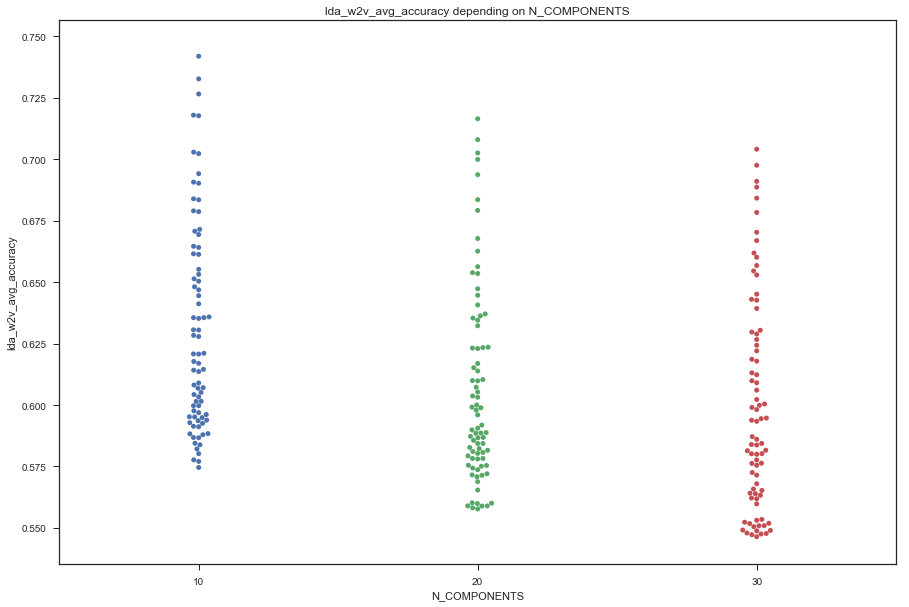

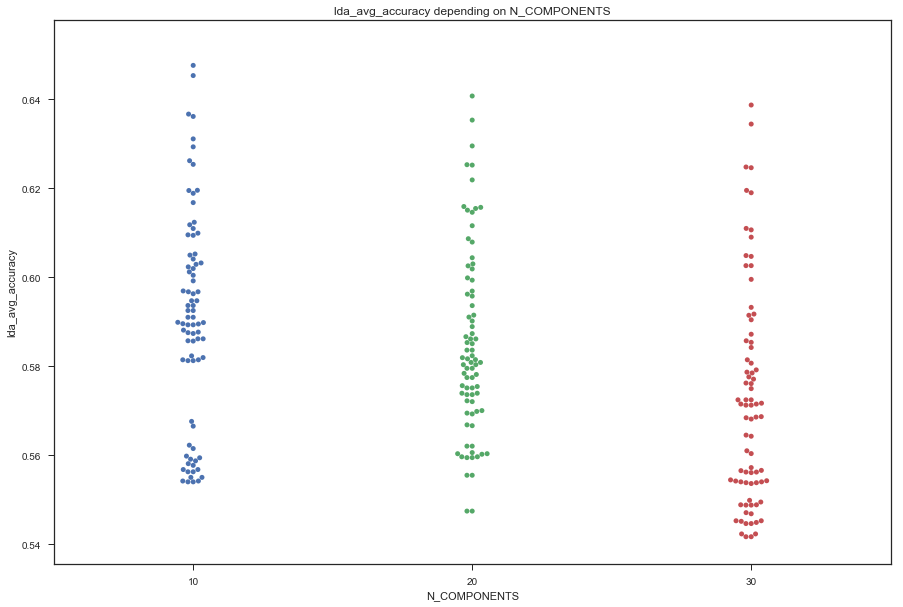

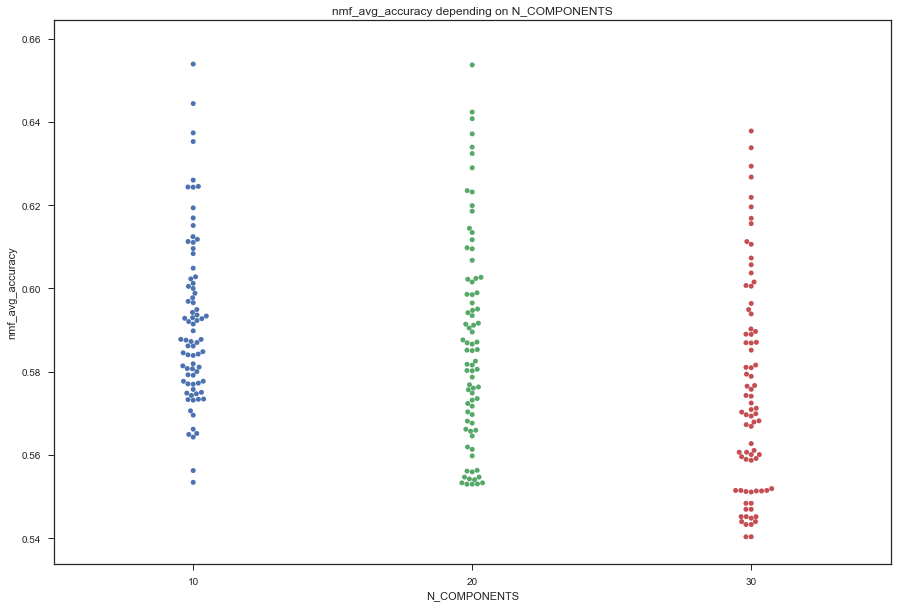

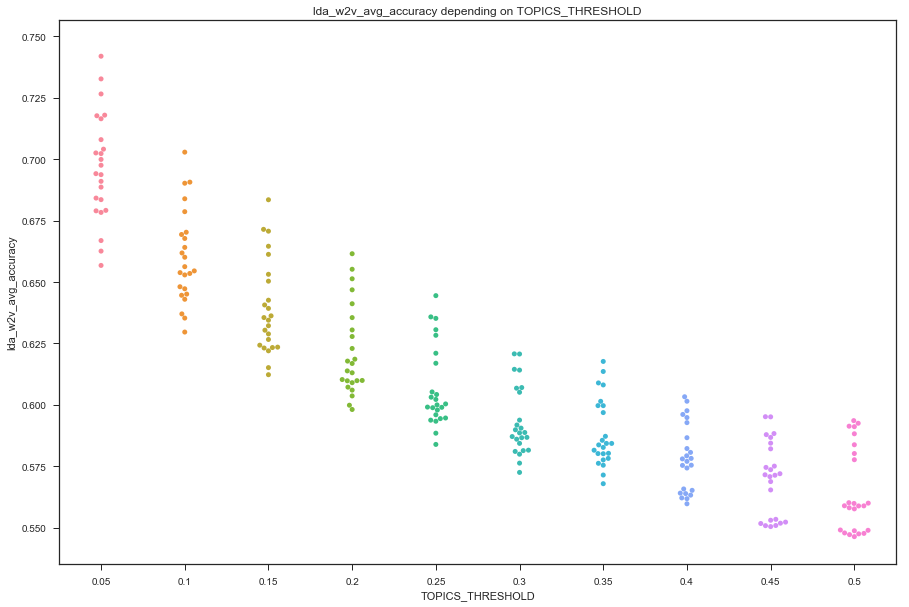

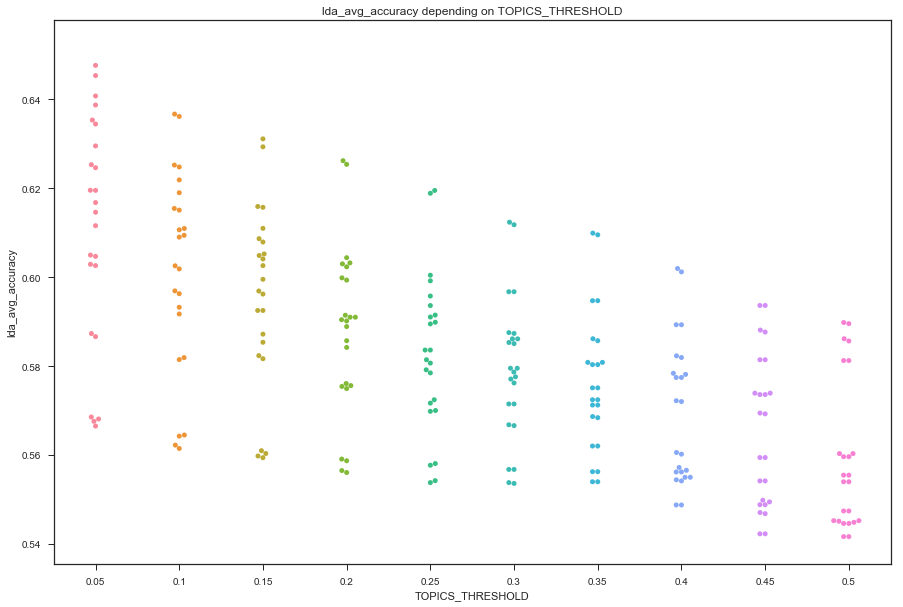

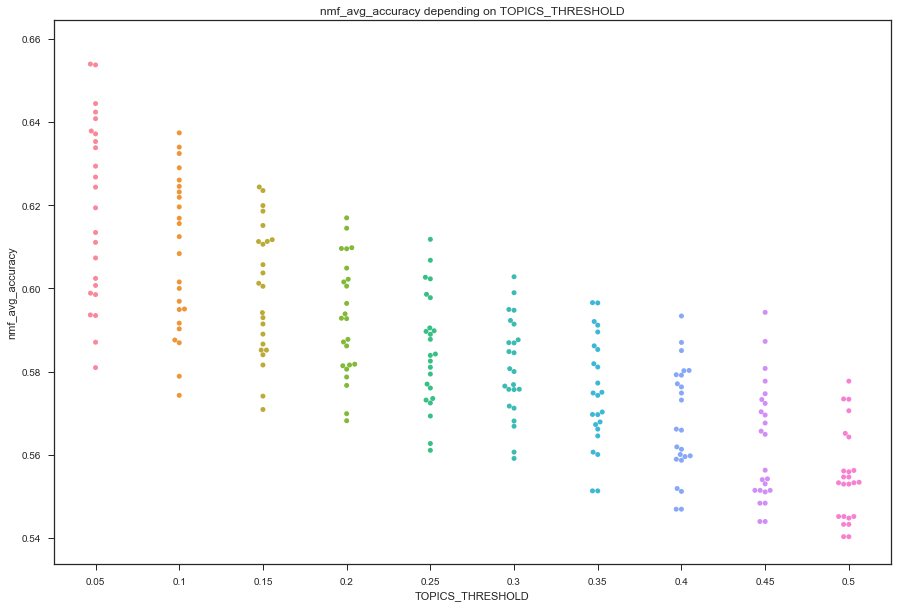

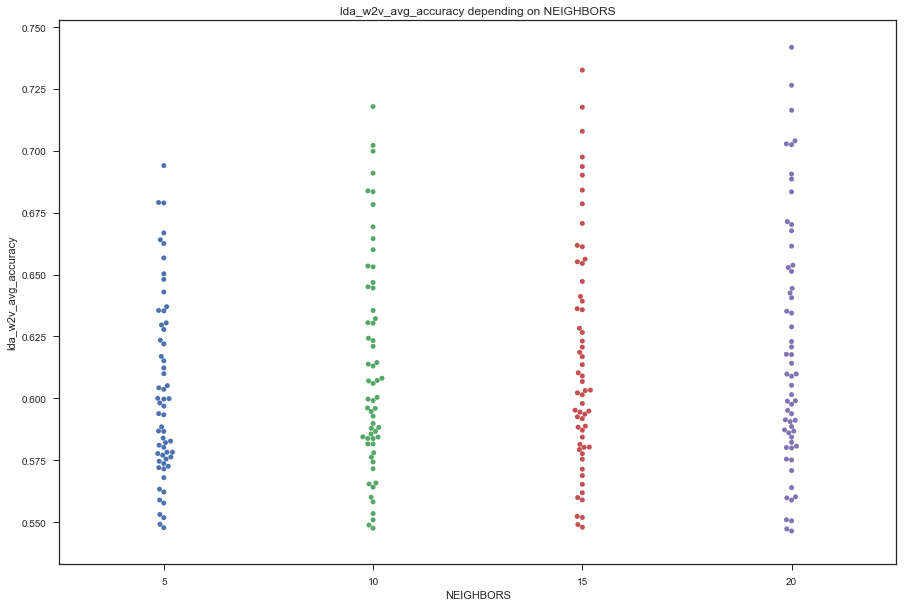

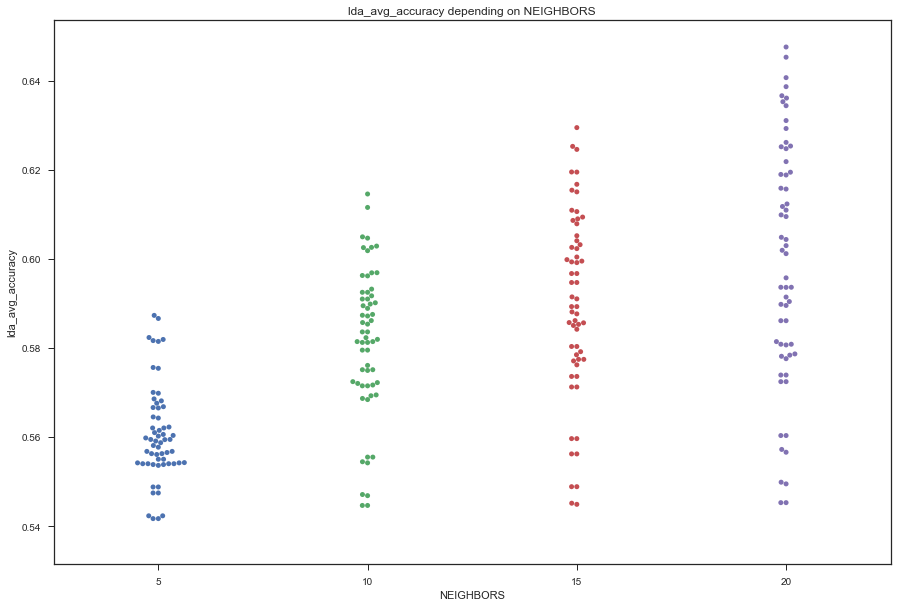

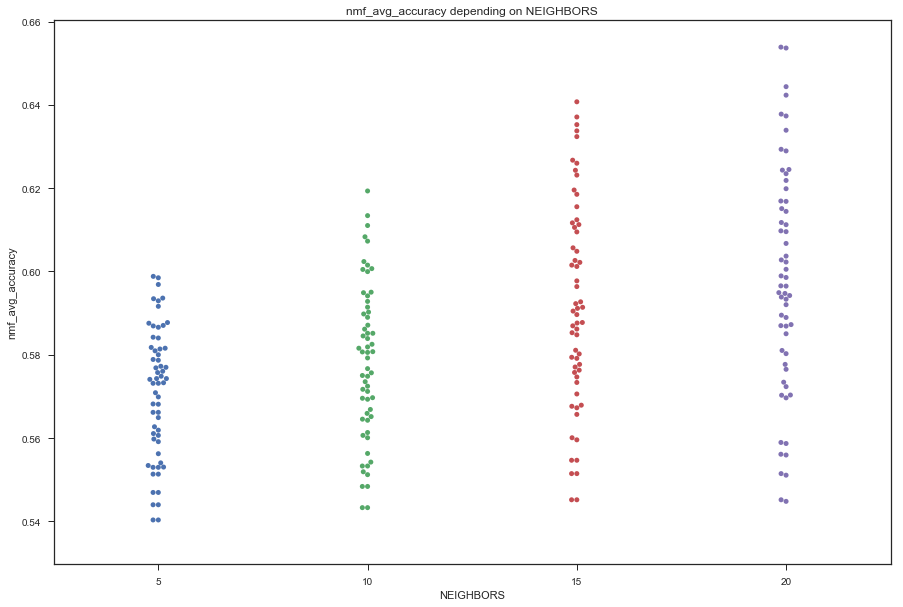

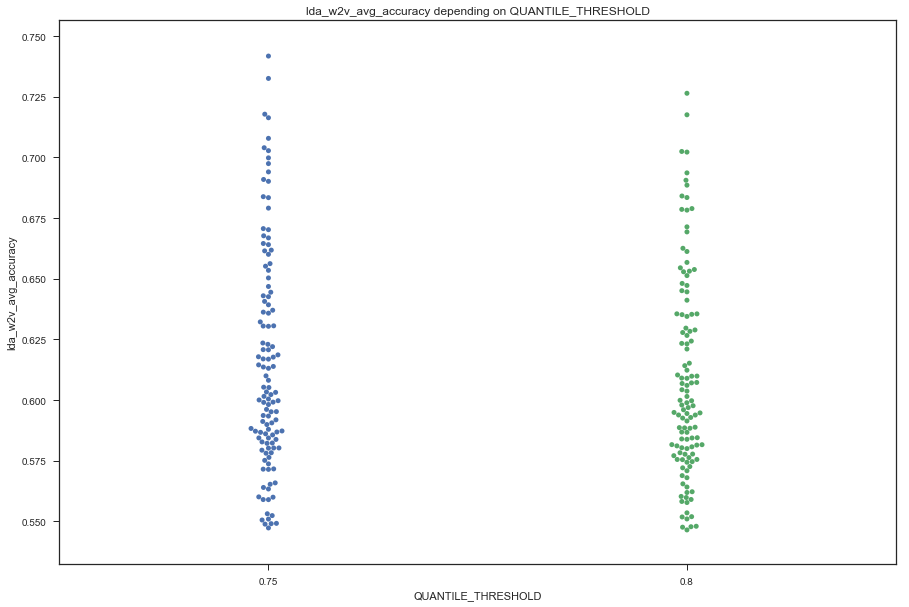

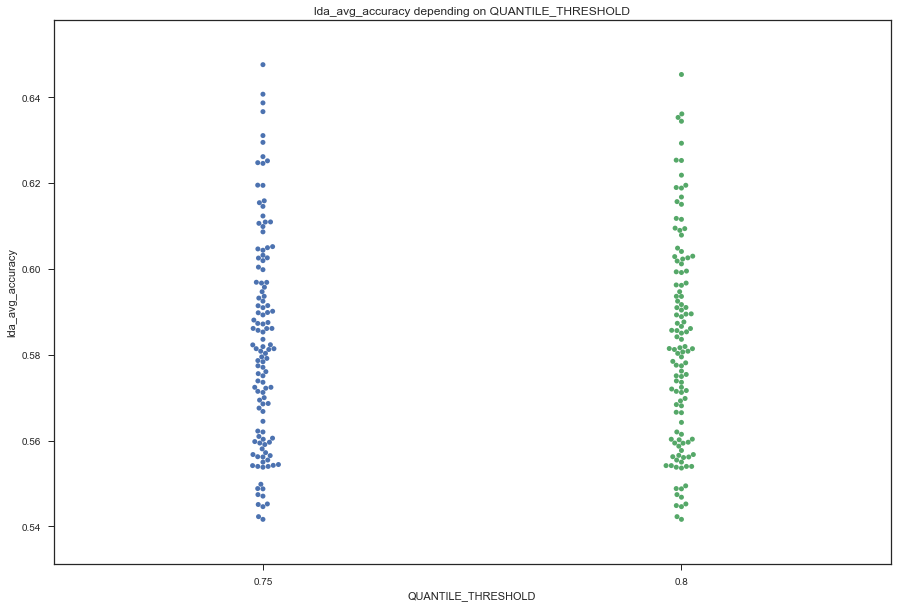

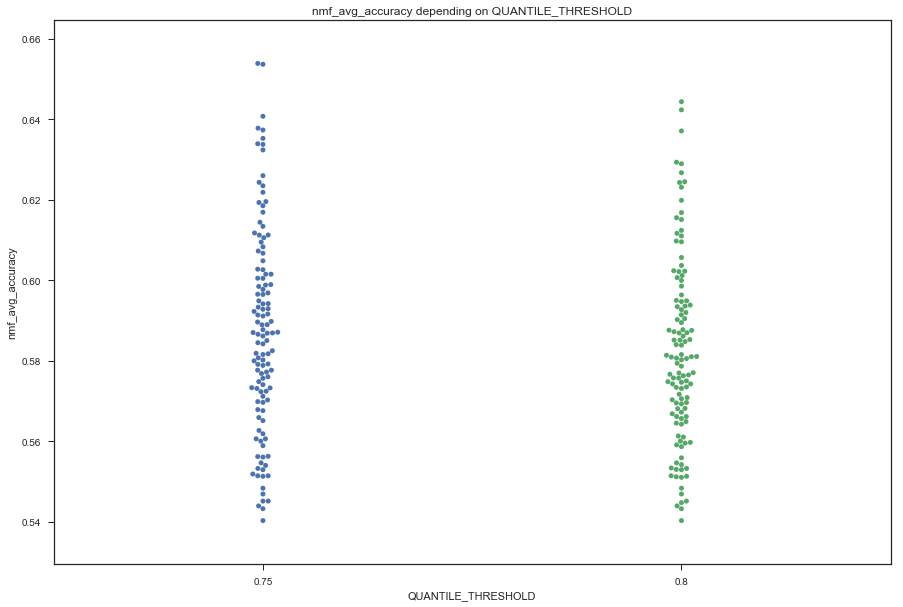

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
for parameter in ['N_COMPONENTS','TOPICS_THRESHOLD','NEIGHBORS','QUANTILE_THRESHOLD']:
    for column in ['lda_w2v_avg_accuracy','lda_avg_accuracy','nmf_avg_accuracy']:
        plt.figure(figsize=(15,10))
        plt.title("%s depending on %s"%(column,parameter))
        ax = sns.swarmplot(x=parameter, y=column, data=results)

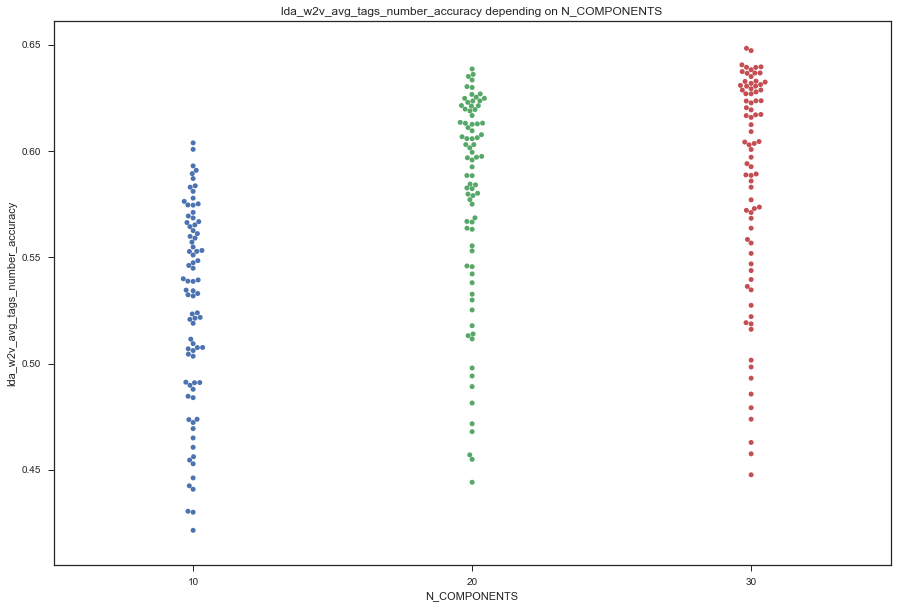

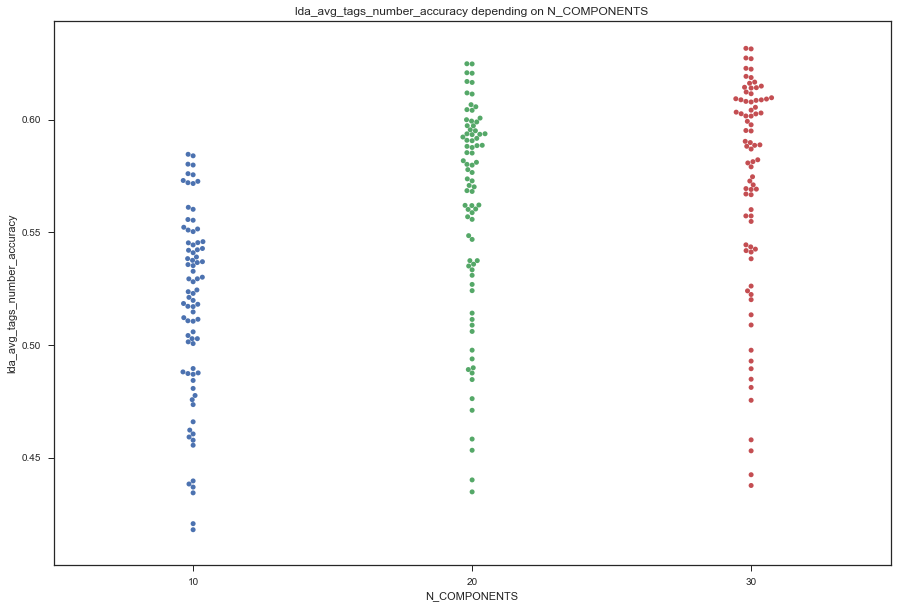

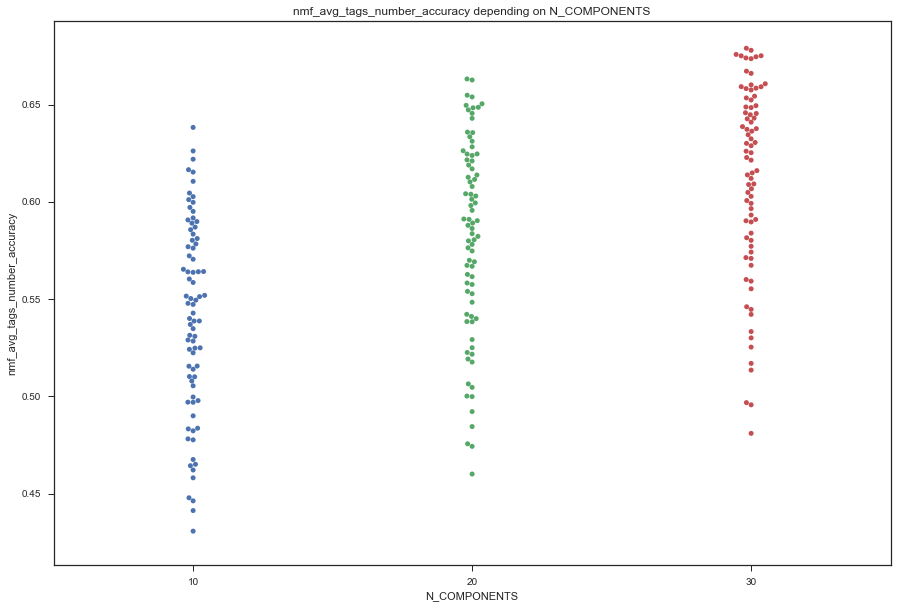

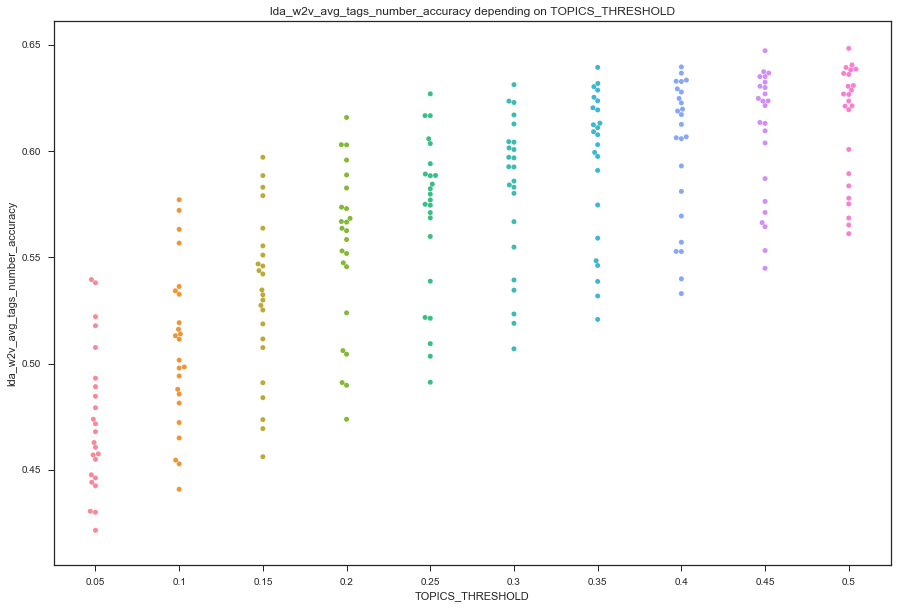

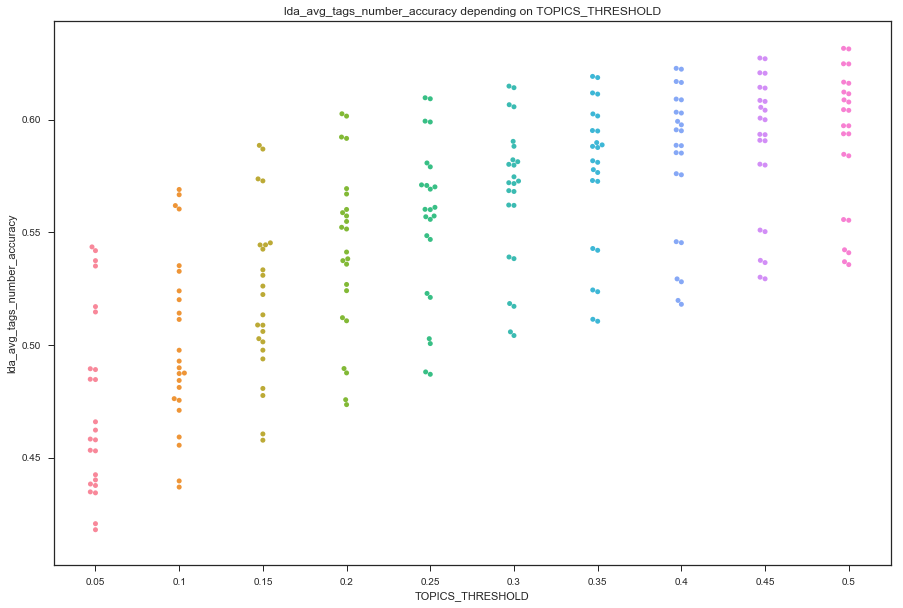

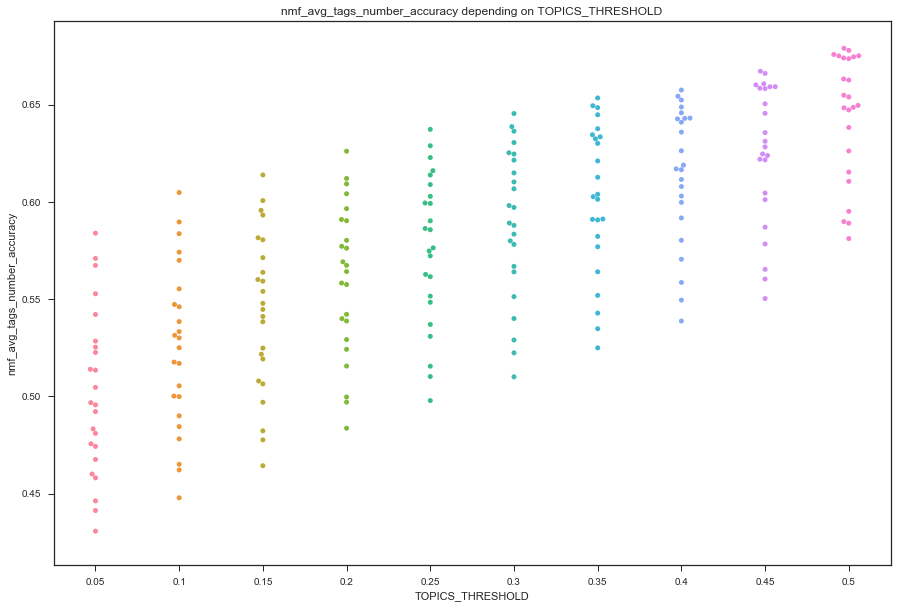

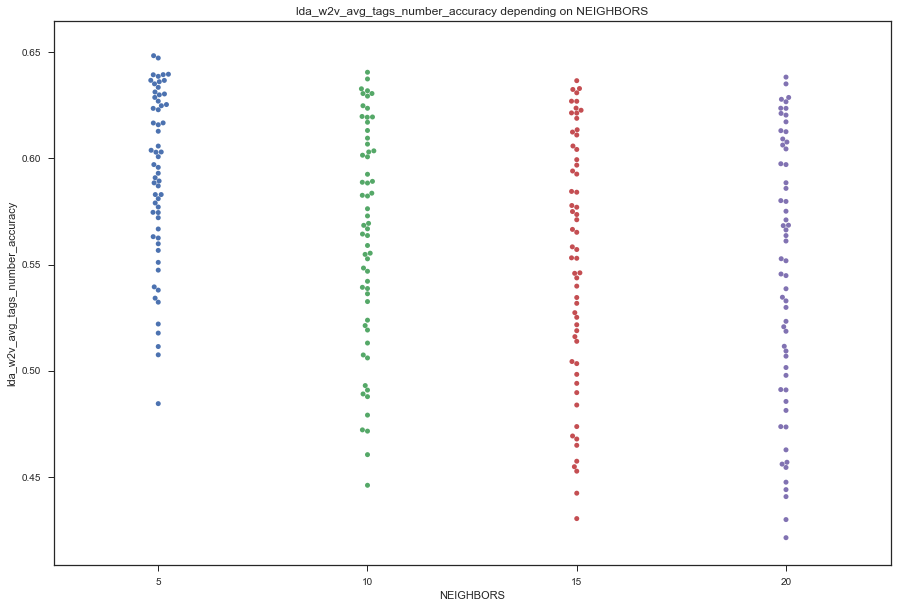

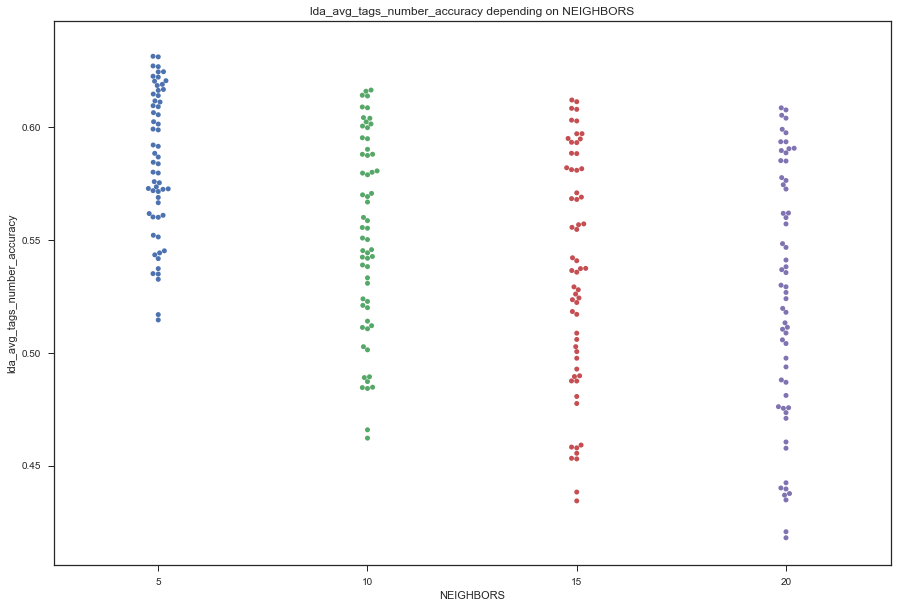

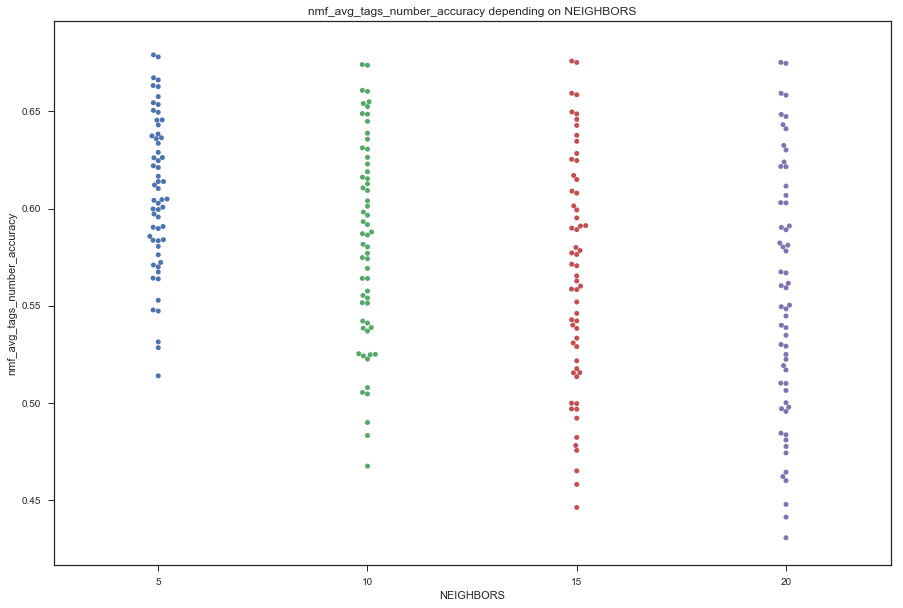

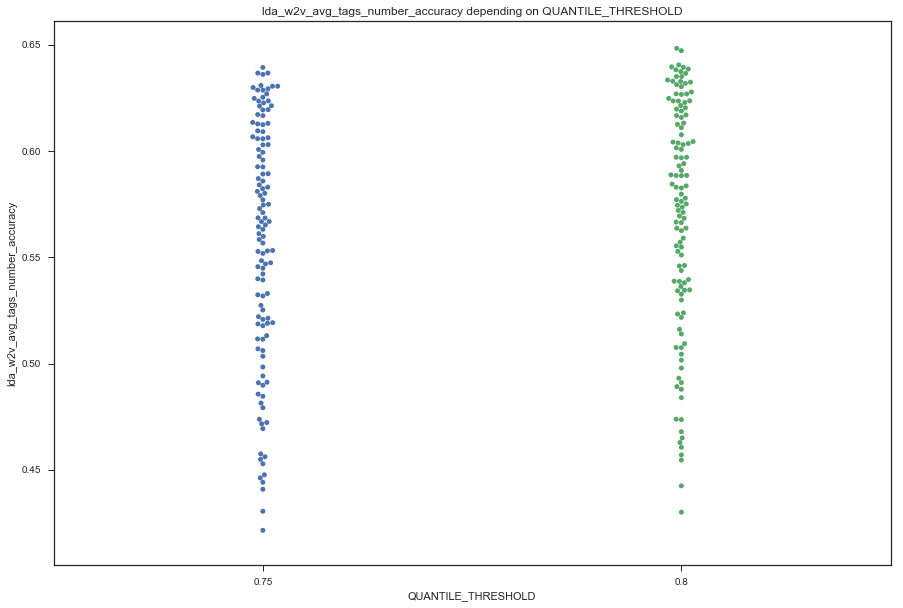

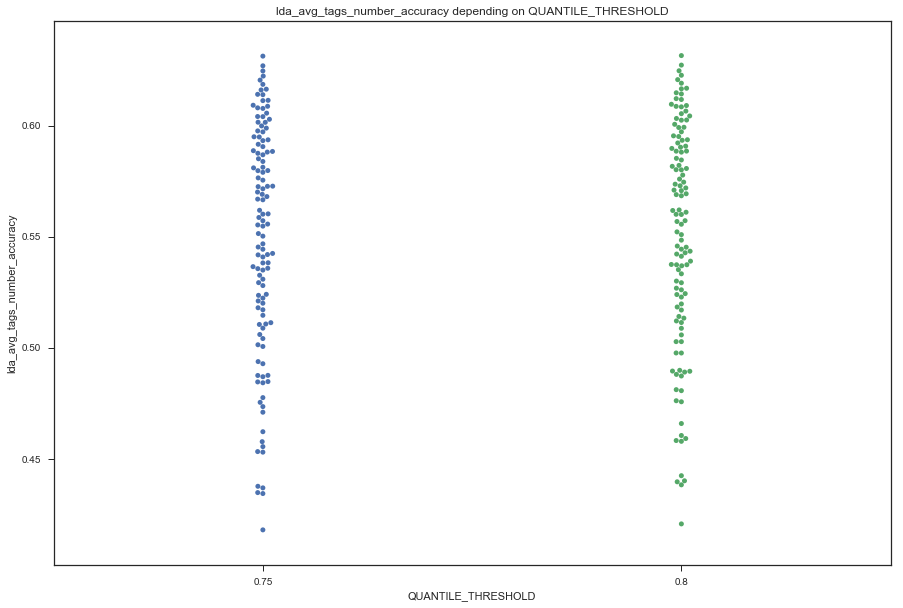

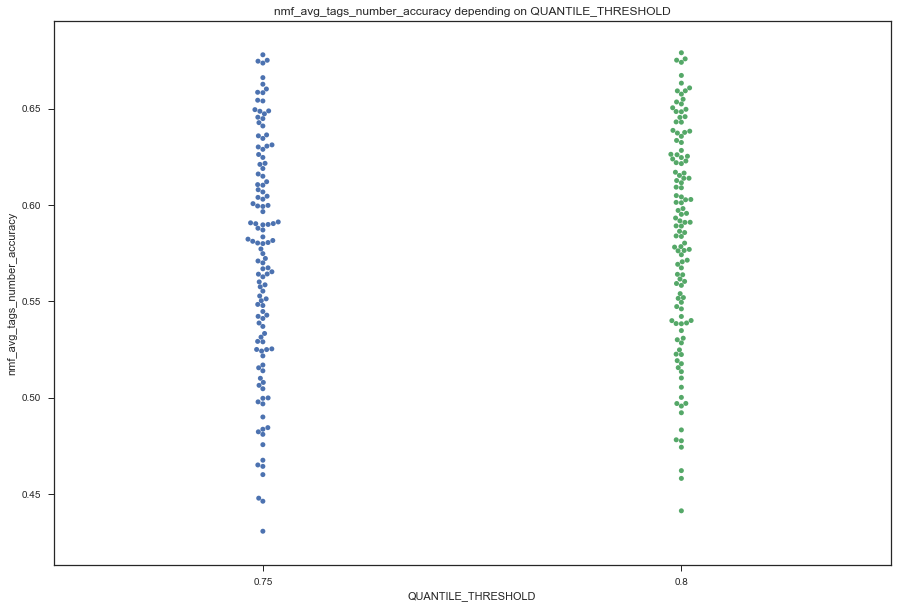

In [42]:
for parameter in ['N_COMPONENTS','TOPICS_THRESHOLD','NEIGHBORS','QUANTILE_THRESHOLD']:
    for column in ['lda_w2v_avg_tags_number_accuracy','lda_avg_tags_number_accuracy','nmf_avg_tags_number_accuracy']:
        plt.figure(figsize=(15,10))
        plt.title("%s depending on %s"%(column,parameter))
        ax = sns.swarmplot(x=parameter, y=column, data=results)

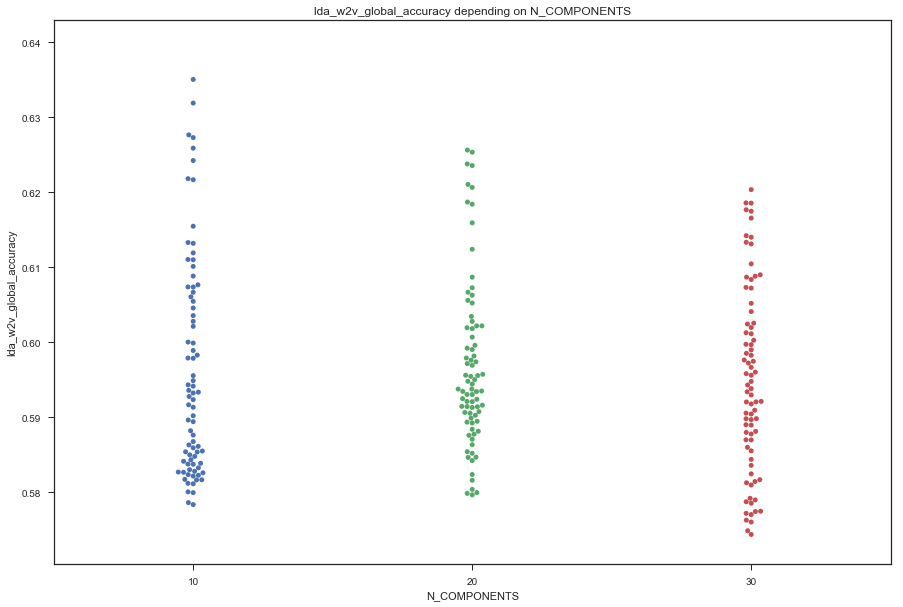

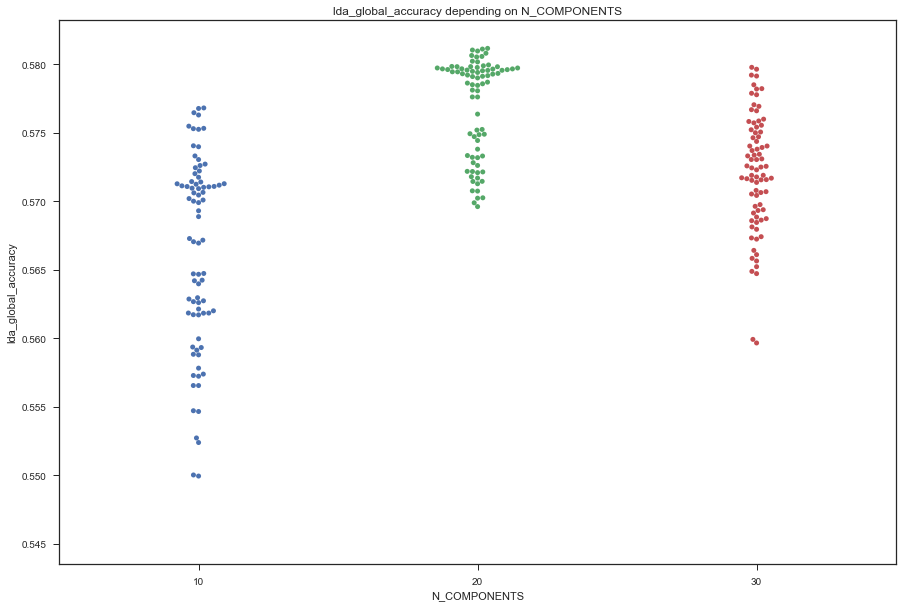

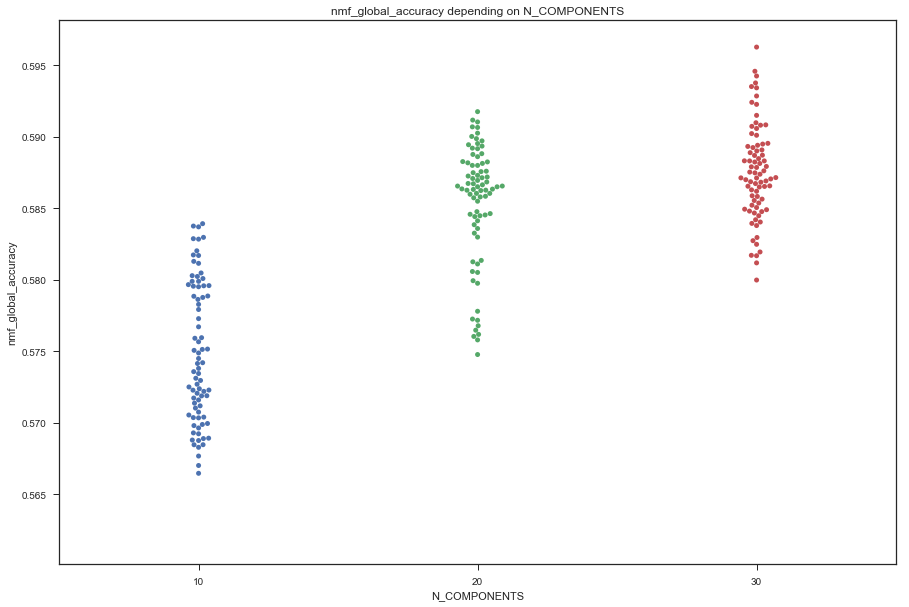

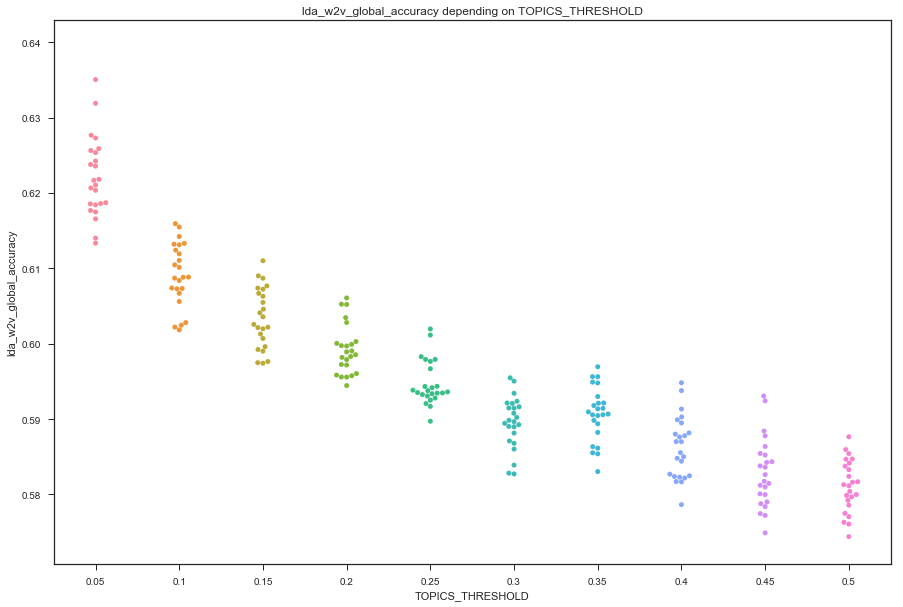

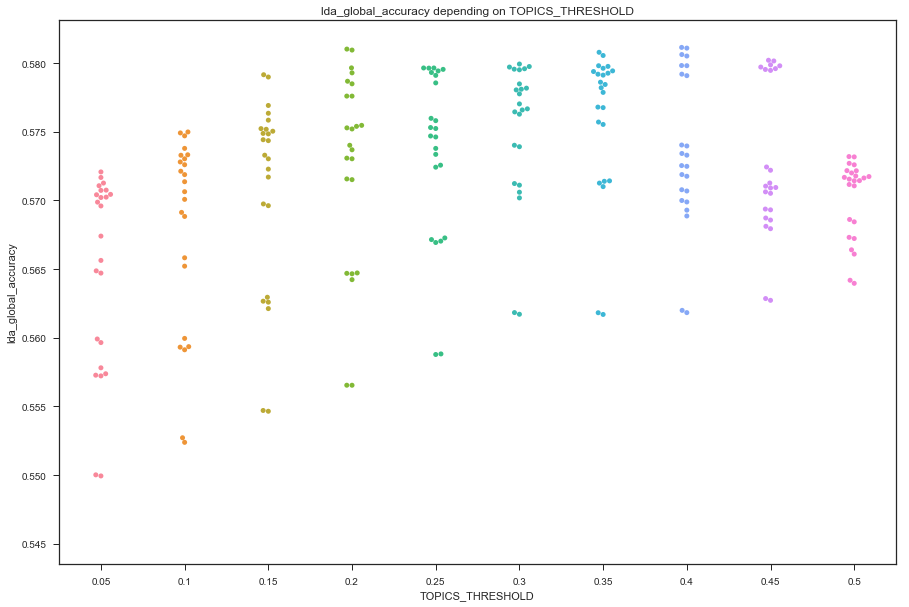

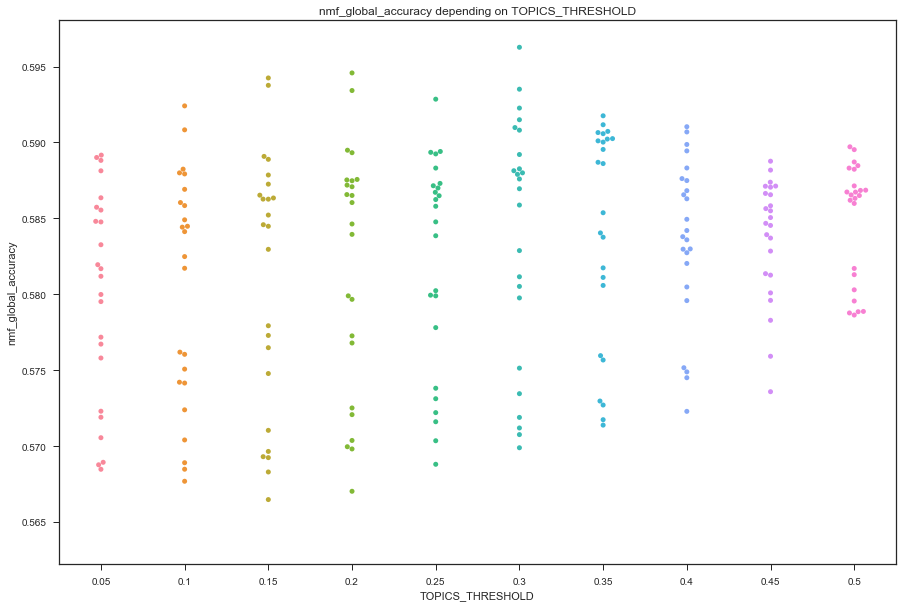

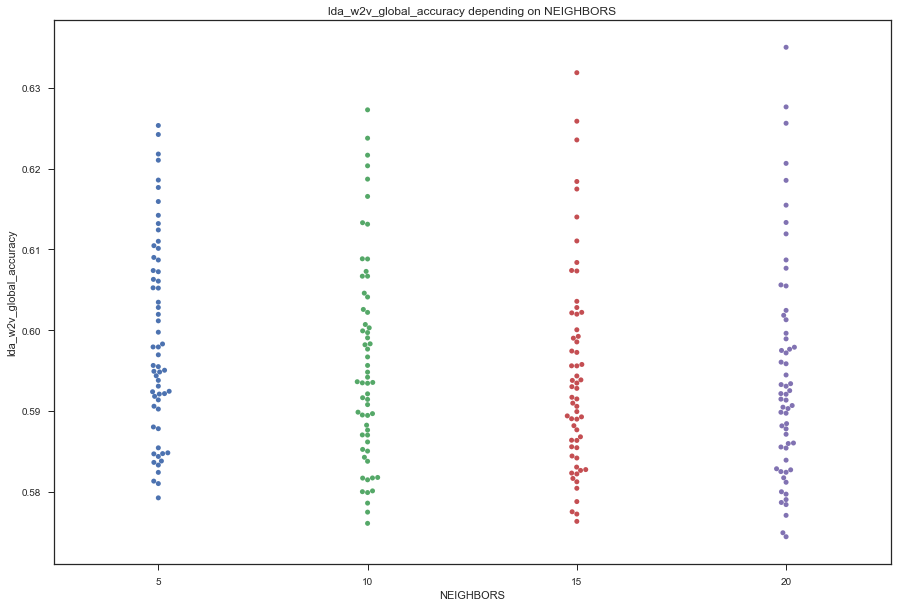

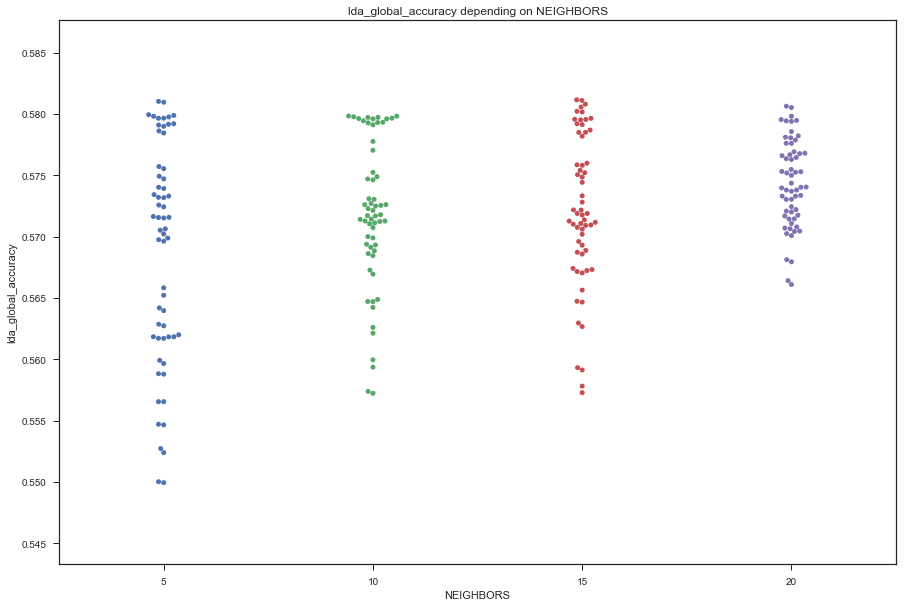

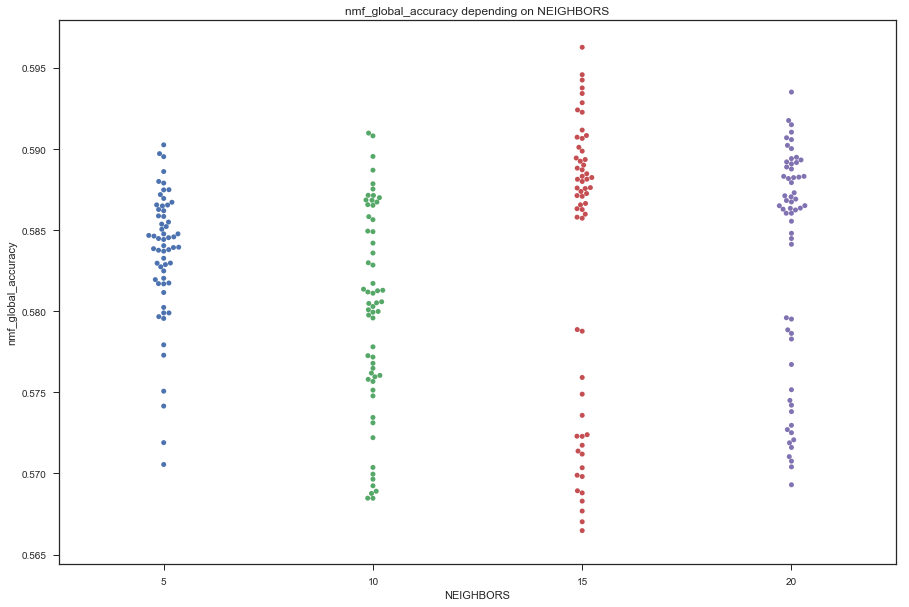

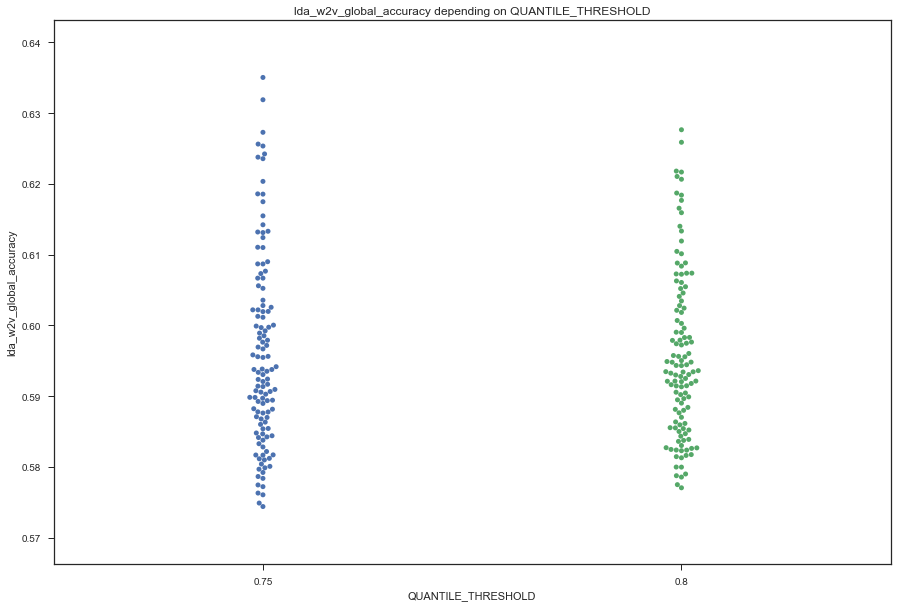

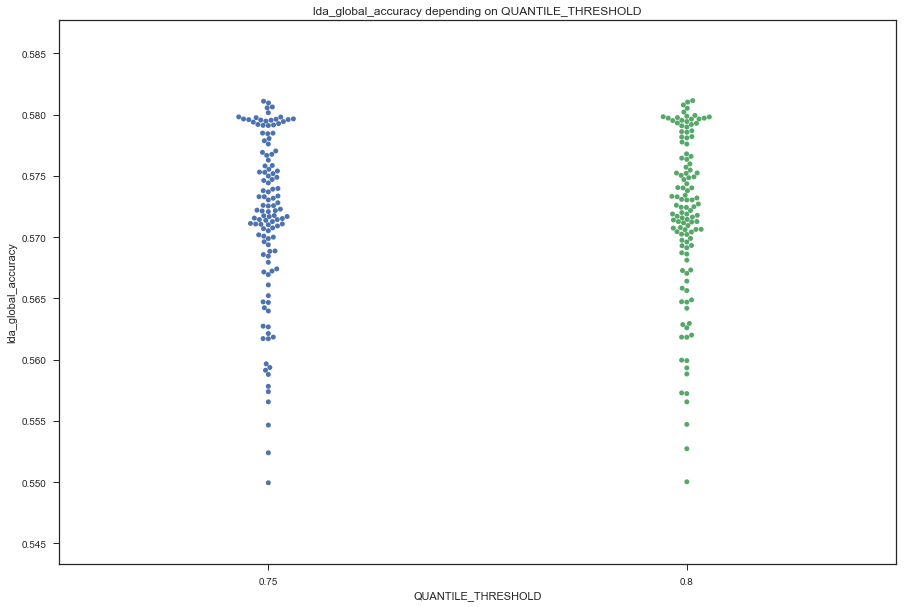

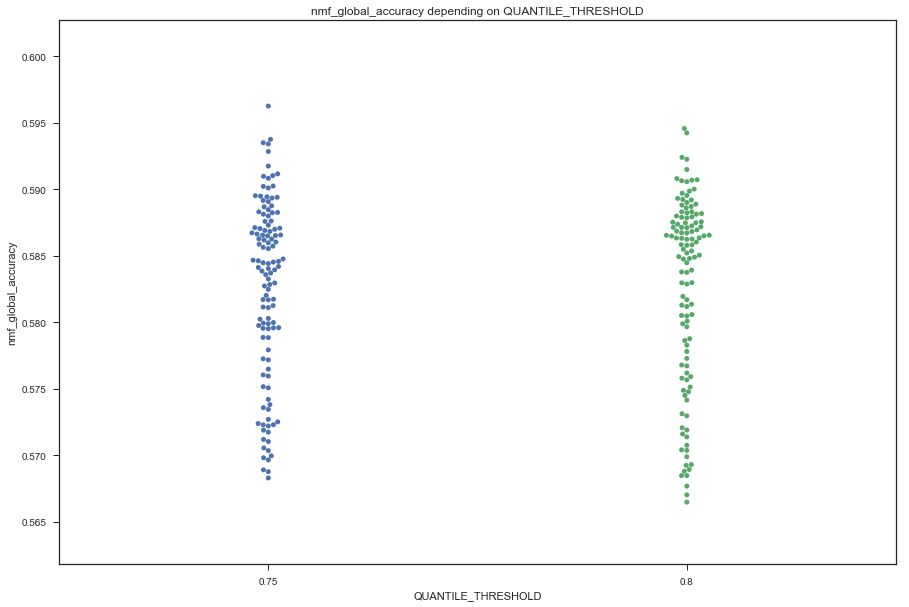

In [40]:
for parameter in ['N_COMPONENTS','TOPICS_THRESHOLD','NEIGHBORS','QUANTILE_THRESHOLD']:
    for column in ['lda_w2v_global_accuracy','lda_global_accuracy','nmf_global_accuracy']:
        plt.figure(figsize=(15,10))
        plt.title("%s depending on %s"%(column,parameter))
        ax = sns.swarmplot(x=parameter, y=column, data=results)

In [11]:
results.filter(regex=("accuracy"))

,orig_avg_accuracy,nmf_avg_accuracy,lda_avg_accuracy,lda_w2v_avg_accuracy,nmf_avg_tags_number_accuracy,lda_avg_tags_number_accuracy,lda_w2v_avg_tags_number_accuracy,nmf_global_accuracy,lda_global_accuracy,lda_global_avg_accuracy,orig_med_accuracy,nmf_med_accuracy,lda_med_accuracy,lda_w2v_med_accuracy
0,0.532138,0.598830,0.567572,0.694063,0.513989,0.514669,0.484580,0.570550,0.549938,0.624235,0.532138,0.598830,0.567572,0.694063
1,0.532138,0.593610,0.566503,0.678943,0.528475,0.517045,0.507551,0.571898,0.550017,0.621813,0.532138,0.593610,0.566503,0.678943
2,0.532138,0.619346,0.604931,0.717862,0.467605,0.462272,0.446145,0.568766,0.557378,0.627290,0.532138,0.619346,0.604931,0.717862
3,0.532138,0.611044,0.602855,0.702226,0.483320,0.465955,0.460568,0.568469,0.557222,0.621673,0.532138,0.611044,0.602855,0.702226
4,0.532138,0.635283,0.619497,0.732604,0.446319,0.434441,0.430466,0.572295,0.557812,0.631891,0.532138,0.635283,0.619497,0.732604
5,0.532138,0.624314,0.616730,0.717610,0.458162,0.438366,0.442427,0.568930,0.557275,0.625882,0.532138,0.624314,0.616730,0.717610
6,0.532138,0.653899,0.647560,0.741824,0.430753,0.418089,0.421478,0.579517,0.571069,0.635042,0.532138,0.653899,0.647560,0.741824
7,0.532138,0.644403,0.645270,0.726478,0.441343,0.420778,0.430002,0.576716,0.570440,0.627653,0.532138,0.644403,0.645270,0.726478
8,0.532138,0.596881,0.562226,0.664075,0.531447,0.532699,0.511454,0.575069,0.552384,0.613202,0.532138,0.596881,0.562226,0.664075
9,0.532138,0.587572,0.561472,0.648075,0.547309,0.535210,0.534236,0.574151,0.552718,0.610129,0.532138,0.587572,0.561472,0.648075
